In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import os

In [2]:
DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_and_night_weather.csv"
solar_df = pd.read_csv(DATASET_PATH, sep=",", index_col=0)
solar_df = solar_df.iloc[:, :10]
solar_df.head()

X = solar_df.iloc[:, :-1].values
y = solar_df.iloc[:, -1].values

In [3]:
# K-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True)

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Training on fold {fold + 1}...")

    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)

    mlp_model.fit(X_train_fold, y_train_fold)

    val_predicted = mlp_model.predict(X_val_fold)

    fold_mse = np.mean((val_predicted - y_val_fold) ** 2)
    print(f"Fold {fold + 1} MSE: {fold_mse}")

Training on fold 1...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1 MSE: 318132.1111200262
Training on fold 2...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2 MSE: 298566.3181030048
Training on fold 3...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3 MSE: 366951.7557529
Training on fold 4...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4 MSE: 319979.5293370321
Training on fold 5...
Fold 5 MSE: 294805.28842325014


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
def moving_average(data, n=100):
    cumsum = np.cumsum(data, dtype=float)
    cumsum[n:] = cumsum[n:] - cumsum[:-n]
    return cumsum[n - 1:] / n

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


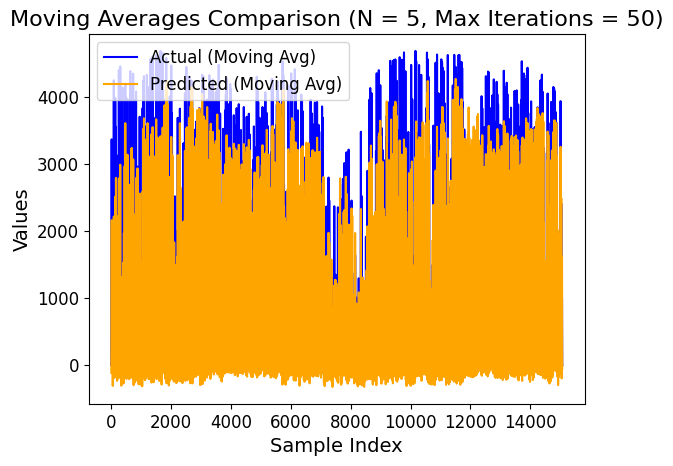

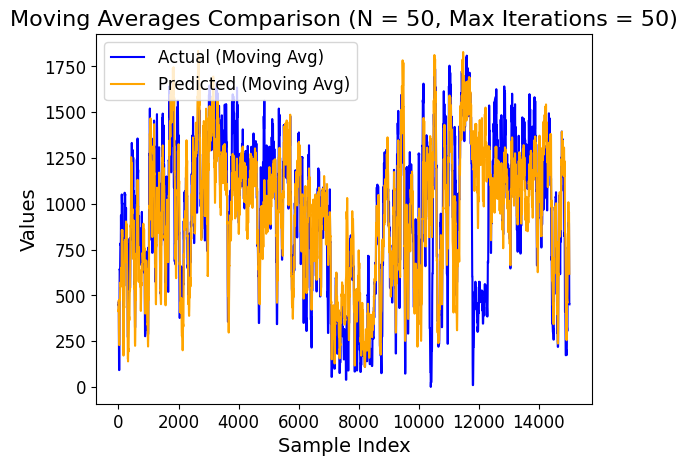

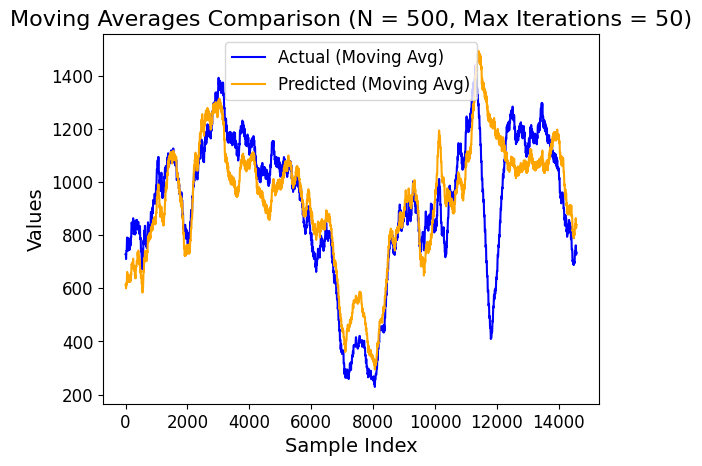

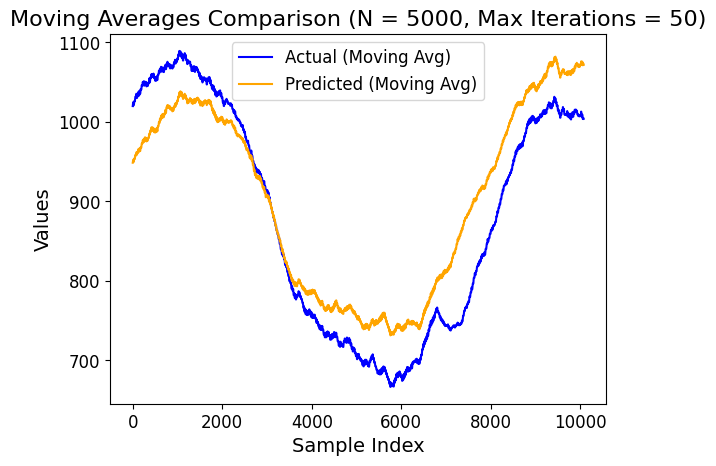

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


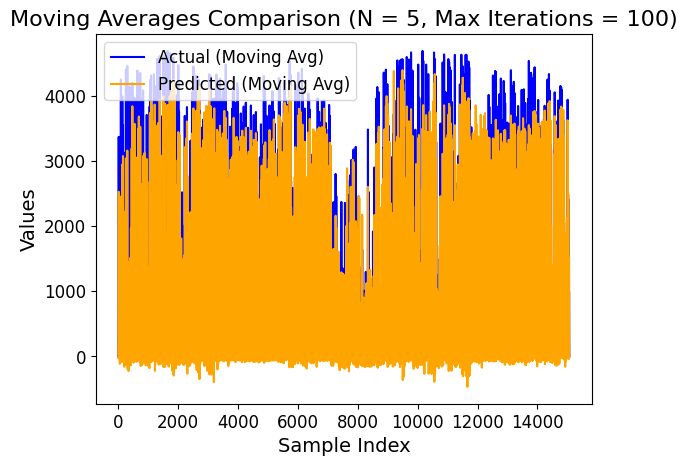

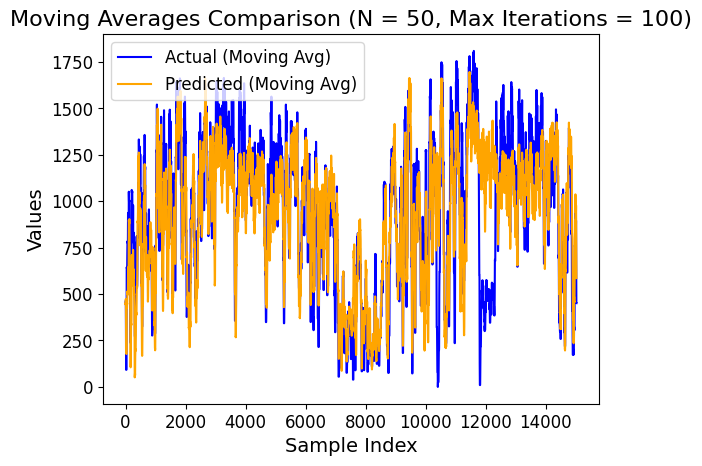

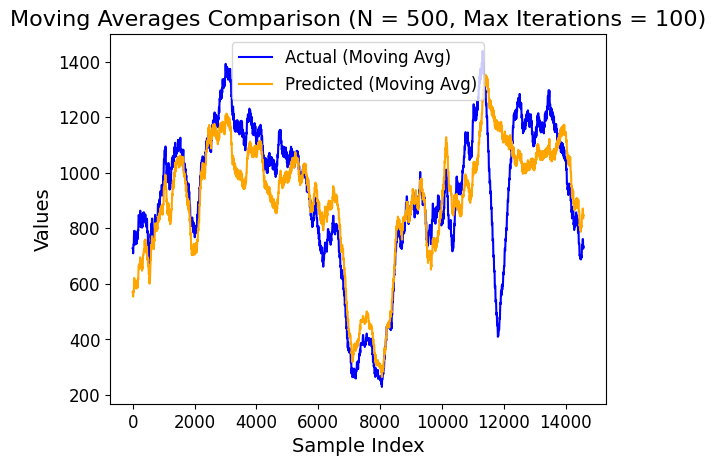

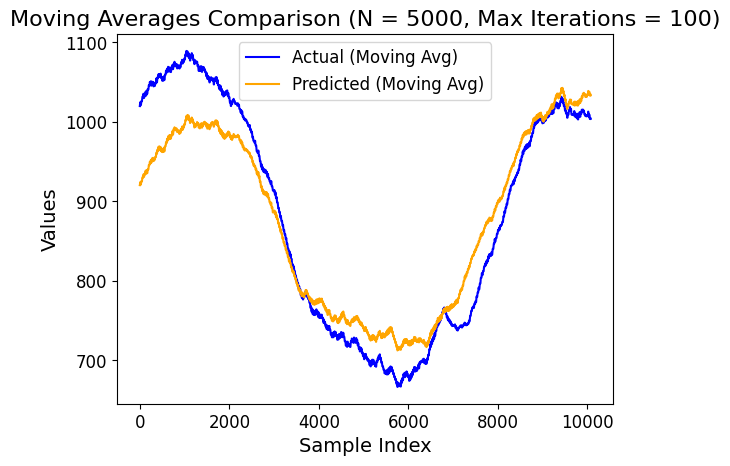

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


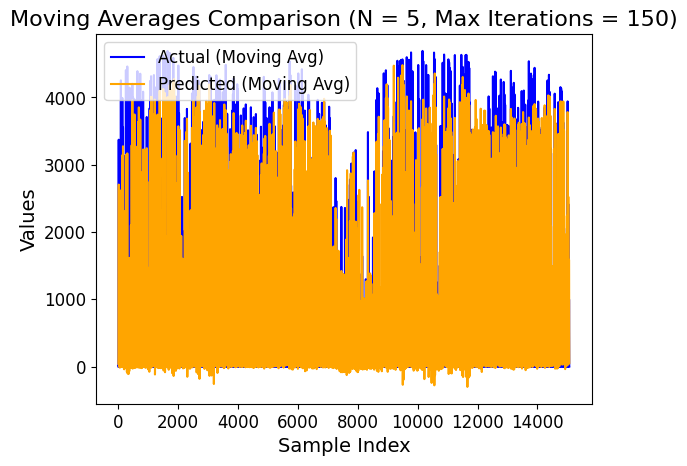

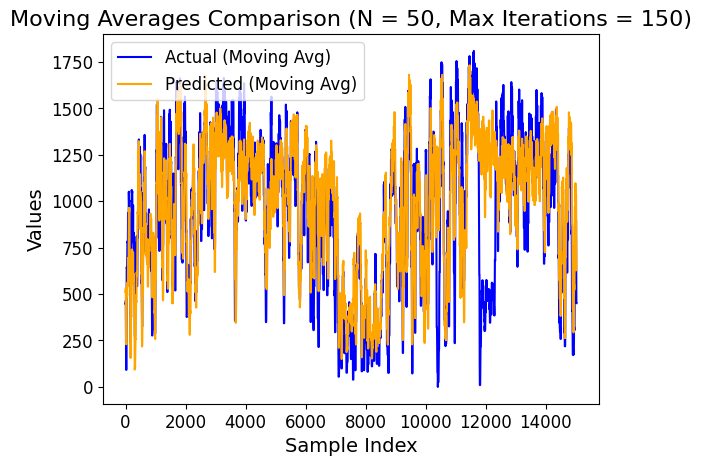

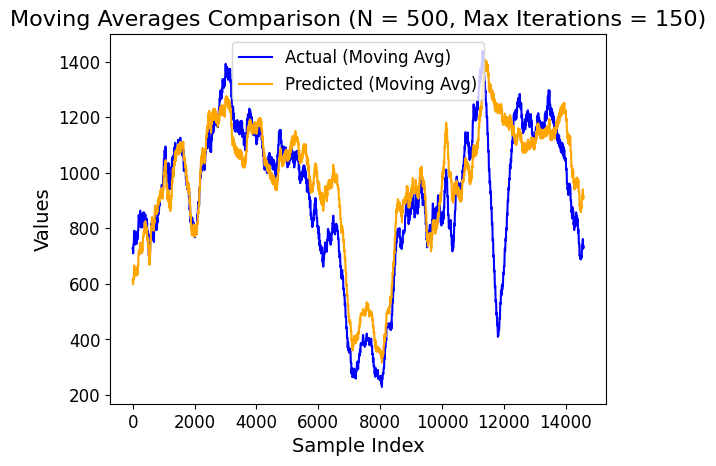

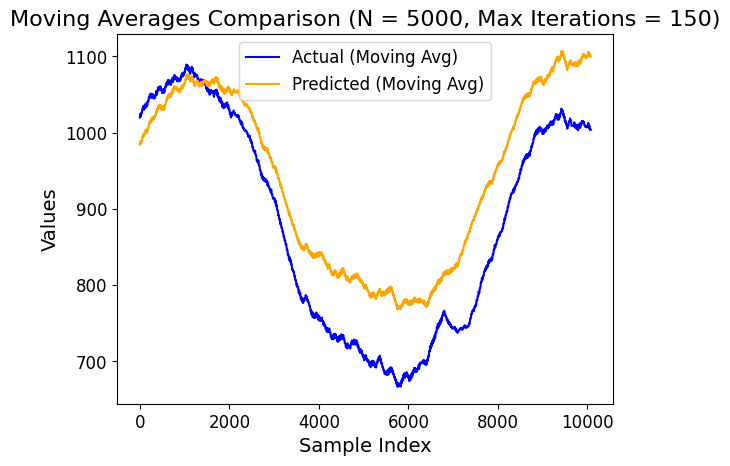

Best Parameters: {'max_iter': 100, 'n': 5000}
Best MSE: 1996.1079005194229


In [6]:
save_dir = 'neural_network_plots'
os.makedirs(save_dir, exist_ok=True)

best_mse = float('inf')
best_params = None

for max_iter in [50, 100, 150]:

    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    final_model.fit(X, y)
    final_model_predicted = final_model.predict(X)
    
    for n in [5, 50, 500, 5000]:

        y_avg = moving_average(y, n)
        predicted_avg = moving_average(final_model_predicted, n)

        mse = mean_squared_error(y_avg, predicted_avg)

        if mse < best_mse:
            best_mse = mse
            best_params = {'max_iter': max_iter, 'n': n}

        plt.plot(y_avg, label='Actual (Moving Avg)', color='blue')
        plt.plot(predicted_avg, label='Predicted (Moving Avg)', color='orange')

        plt.title(f'Moving Averages Comparison (N = {n}, Max Iterations = {max_iter})', fontsize=16)
        plt.xlabel('Sample Index', fontsize=14)
        plt.ylabel('Values', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend(fontsize=12)

        plt.savefig(os.path.join(save_dir, f'final_model_plot_{n}_{max_iter}.png'))
        plt.show()

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)